# Logistic Regression (Regressão Logística)

**[EN-US]**

Logistic Regression is a model that we use for supervised learning tasks and for classification tasks, that is, when the target label $y$ that we are trying to predict can only have 2 values, 0 or 1 (binary classification), for example.

Let's say we are trying to classify whether an image has a cat or not, using a logistic regression model for this task, it will return 1 for when there is a cat in the image and 0 when there is no cat in the image.

We want $\hat y$ to be the probability that $y$ is equal to 1, given the input features $\vec x$, $\hat{y}\ =\ P(y - 1 | \vec x)$.


**[PT-BR]**

Regressão Logística é um modelo que utilizamos para tarefas de aprendizado supervisionado e para tarefas de classificação, ou seja, quando o target label $y$ que estamos tentando prever só pode ter 2 valores, 0 ou 1 (classificação binária), por exemplo.

Digamos que estamos tentando classificar se em uma imagem tem um gato ou não, utilizando um modelo de regressão logística para essa tarefa, ele irá retornar 1 para quando tiver um gato na imagem e 0 quando não tiver um gato na imagem.

Queremos que $\hat y$ seja a probabilidade de que $y$ seja igual a 1, dado as input features $\vec x$, $\hat{y}\ =\ P(y - 1 | \vec x)$.

## Table of Contents
* [Libraries](#Libraries-(Bibliotecas))
* [Logistic Regression](#Logistic-Regression-Model-(Modelo-Regressão-Logística))
    * [Cost Function](#Cost-Function-for-Logistic-Regression-(Cost-Function-para-Regressão-Logística))
    * [Gradient Descent](#Gradient-Descent-for-Logistic-Regression-(Gradient-Descent-para-Regressão-Logística))
    * [Evaluate Metric](#Classification-Error)
* [Regularized Logistic Regression](#Regularized-Logistic-Regression-(Regressão-Logística-Regularizada))
    * [Cost Function](#Cost-Function-for-Regularized-Logistic-Regression-(Cost-Function-para-Regressão-Logística-Regularizada))
    * [Gradient Descent](#Gradient-Descent-for-Regularized-Logistic-Regression-(Gradient-Descent-para-Regressão-Logística-Regularizada))

## Libraries (Bibliotecas)

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import math, copy

## Logistic Regression Model (Modelo Regressão Logística)
Model:
$$z = f_{w, b}(\mathbf{X}) = \mathbf{X} \cdot \mathbf{w} + b$$
$$g(z) = \frac{1}{1 + e^{-z}}$$

In [1]:
def sigmoid_function(z):
    g = 1 / (1 + np.exp(-z))
    return g

In [7]:
z_tmp = np.arange(-10, 11)
y = sigmoid_function(z_tmp)

np.set_printoptions(precision=3)
print(f'Input (z), Output (sigmoid_function(z))\n{np.c_[z_tmp, y]}')

Input (z), Output (sigmoid_function(z))
[[-1.000e+01  4.540e-05]
 [-9.000e+00  1.234e-04]
 [-8.000e+00  3.354e-04]
 [-7.000e+00  9.111e-04]
 [-6.000e+00  2.473e-03]
 [-5.000e+00  6.693e-03]
 [-4.000e+00  1.799e-02]
 [-3.000e+00  4.743e-02]
 [-2.000e+00  1.192e-01]
 [-1.000e+00  2.689e-01]
 [ 0.000e+00  5.000e-01]
 [ 1.000e+00  7.311e-01]
 [ 2.000e+00  8.808e-01]
 [ 3.000e+00  9.526e-01]
 [ 4.000e+00  9.820e-01]
 [ 5.000e+00  9.933e-01]
 [ 6.000e+00  9.975e-01]
 [ 7.000e+00  9.991e-01]
 [ 8.000e+00  9.997e-01]
 [ 9.000e+00  9.999e-01]
 [ 1.000e+01  1.000e+00]]


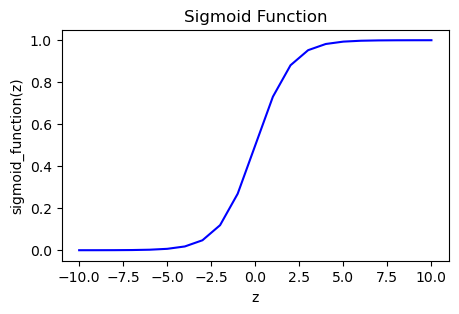

In [8]:
fig, ax = plt.subplots(1, 1, figsize=(5, 3))
ax.plot(z_tmp, y, c='b')
ax.set_title('Sigmoid Function')
ax.set_ylabel('sigmoid_function(z)')
ax.set_xlabel('z')
plt.show()

### Cost Function for Logistic Regression (Cost Function para Regressão Logística)
**[EN-US]**

We using Logistic Loss Function
- $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ is the cost for a single data point

**[PT-BR]**

Usamos a Logistic Loss Function
- $loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)})$ é o cost para um único exemplo
$$J(\mathbf{w}, b) = -\frac{1}{m} \sum\limits_{i=0}^{m-1} [(-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right))]$$


$$\begin{align*}
& J(\mathbf{w},b) = \frac{1}{m} \sum_{i=0}^{m-1} \left[ loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) \right] \\
& loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \\ \\
& f_{\mathbf{w},b}(\mathbf{x^{(i)}}) = g(z^{(i)}) \\ \\
& z^{(i)} = \mathbf{w} \cdot \mathbf{x}^{(i)}+ b \\ \\
& g(z^{(i)}) = \frac{1}{1+e^{-z^{(i)}}} 
\end{align*}$$

In [12]:
X_train = np.array([[0.5, 1.5], [1,1], [1.5, 0.5], [3, 0.5], [2, 2], [1, 2.5]])
y_train = np.array([0, 0, 0, 1, 1, 1])

In [2]:
def compute_cost_logistic(X, y, w, b, sigmoid_function):
    m, _ = X.shape
    loss = .0

    for i in range(m):
        z_i = np.dot(w, X[i]) + b
        f_wb_i = sigmoid_function(z_i)
        loss += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    cost = loss / m
    return cost

In [64]:
w = np.zeros((2,))
b = 0

print(compute_cost_logistic(X_train, y_train, w, b, sigmoid_function))

0.6931471805599453


### Gradient Descent for Logistic Regression (Gradient Descent para Regressão Logística)

$$\begin{align*}
&\text{repeat until convergence (repita até convergir): for } j := 0, ..., n - 1\; \lbrace \\
&  \; \; \;w_j := w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; \\ 
&  \; \; \;  \; \;b := b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)} \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})
\end{align*}$$

In [3]:
def compute_gradient_logistic(X, y, w, b, sigmoid_function):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):
        f_wb_i = sigmoid_function(np.dot(w, X[i]) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [4]:
def logistic_gradient_descent(X, y, w_in, b_in, alpha, num_iters, compute_gradient_logistic, sigmoid_function, compute_cost_logistic):
    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):
        dj_dw, dj_db = compute_gradient_logistic(X, y, w, b, sigmoid_function)

        w = w- alpha * dj_dw
        b -= alpha * dj_db

        if i < 100000:
            J_history.append(compute_cost_logistic(X, y, w, b, sigmoid_function))

        if i % math.ceil(num_iters / 10) == 0:
            print(f'Iteration {i:4d}: Cost {J_history[-1]:8.2f}')

    return w, b, J_history

In [38]:
w_tmp  = np.zeros_like(X_train[0])
b_tmp  = 0.
alph = 0.1
iters = 10000

w_out, b_out, _ = logistic_gradient_descent(X_train, y_train, w_tmp, b_tmp, alph, iters,
                                  compute_gradient_logistic, sigmoid_function, compute_cost_logistic) 
print(f"\nupdated parameters: w:{w_out}, b:{b_out}")

Iteration    0: Cost     0.68
Iteration 1000: Cost     0.16
Iteration 2000: Cost     0.08
Iteration 3000: Cost     0.06
Iteration 4000: Cost     0.04
Iteration 5000: Cost     0.03
Iteration 6000: Cost     0.03
Iteration 7000: Cost     0.02
Iteration 8000: Cost     0.02
Iteration 9000: Cost     0.02

updated parameters: w:[5.281 5.078], b:-14.222409982019837


In [5]:
def predict(X, w, b):
    m, n = X.shape
    yhat = np.zeros(m)

    for i in range(m):
        z_wb = 0
        for j in range(n): #[EN-US] Or just z_wb += np.dot(X[i], w), outside the loop. [PT-BR] Ou apenas z_wb += np.dot(X[i], w), fora do loop. 
            z_wb += X[i, j] * w[j]

        z_wb += b
        f_wb = 1 / (1 + np.exp(-z_wb))

        if f_wb >= 0.5:
            yhat[i] = 1
        else:
            yhat[i] = 0
    return yhat

### Classification Error
Accuracy (Acurácia):
$$ J(w, b) =\frac{1}{m}\sum_{i=0}^{m-1} 
\begin{cases}
    1, & \text{if $\hat{y}^{(i)} \neq y^{(i)}$}\\
    0, & \text{otherwise}
\end{cases}
$$

In [6]:
def accuracy(y, yhat):
    m = len(y)
    err = .0
    for i in range(m):
        if yhat[i] != y[i]:
            erro += 1
    err /= m
    return err

## Regularized Logistic Regression (Regressão Logística Regularizada)
### Cost Function for Regularized Logistic Regression (Cost Function para Regressão Logística Regularizada)

$$J(\mathbf{w},b) = \frac{1}{m}  \sum_{i=0}^{m-1} \left[ -y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \right] + \frac{\lambda}{2m}  \sum_{j=0}^{n-1} w_j^2$$

In [7]:
def cost_logistic_reg(X, y, w, b, sigmoid_function, lambda_=1):
    m, n = X.shape
    cost = .0

    for i in range(m):
        f_wb_i = sigmoid_function(np.dot(w, X[i]) + b)
        cost += -y[i] * np.log(f_wb_i) - (1 - y[i]) * np.log(1 - f_wb_i)
    cost /= m

    reg = .0
    for j in range(n):
        reg += w[j] ** 2
    reg *= (lambda_ / (2 * m))

    total_cost = cost + reg
    return total_cost

In [62]:
np.random.seed(1)
X = np.random.rand(5,6)
y = np.array([0,1,0,1,0])
w = np.random.rand(X.shape[1]).reshape(-1,)-0.5
b = 0.5
lambda_ = 0.7
cost = cost_logistic_reg(X, y, w, b, sigmoid_function, lambda_)

print("Regularized cost:", cost)

Regularized cost: 0.6850849138741673


## Gradient Descent for Regularized Logistic Regression (Gradient Descent para Regressão Logística Regularizada)

$$\begin{align*}
&\text{repeat until convergence (repita até convergir): for } j := 0, ..., n - 1 \; \lbrace \\
&  \; \; \;w_j = w_j -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial w_j} \; \\ 
&  \; \; \;  \; \;b = b -  \alpha \frac{\partial J(\mathbf{w},b)}{\partial b} \\
&\rbrace
\end{align*}$$

$$\begin{align*}
\frac{\partial J(\mathbf{w},b)}{\partial w_j}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})x_{j}^{(i)}  +  \frac{\lambda}{m} w_j \\
\frac{\partial J(\mathbf{w},b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)}) 
\end{align*}$$

In [8]:
def gradient_logistic_reg(X, y, w, b, sigmoid_function, lambda_=1):
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = .0

    for i in range(m):
        f_wb_i = sigmoid_function(np.dot(w, X[i]) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i, j]
        dj_db += err_i
    dj_dw /= m
    dj_db /= m

    reg = .0
    for j in range(n):
        dj_dw[j] += (lambda_ / m) * w[j]

    return dj_dw, dj_db

In [57]:
np.random.seed(1)
X = np.random.rand(5,3)
y = np.array([0,1,0,1,0])
w = np.random.rand(X_tmp.shape[1])
b = 0.5
lambda_ = 0.7
dj_dw, dj_db =  gradient_logistic_reg(X, y, w, b, sigmoid_function, lambda_)

print(f"dj_db: {dj_db}", )
print(f"Regularized dj_dw:\n {dj_dw.tolist()}", )

dj_db: 0.341798994972791
Regularized dj_dw:
 [0.17380012933994293, 0.32007507881566943, 0.10776313396851499]
